# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \% 5$
2) $N^2 \% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту

In [1]:
n = 18
n_1, n_2 = n % 5, (n * n) % 5  + 5
print(n_1, n_2)

3 9


In [2]:
import pandas as pd

df = pd.read_csv('../datasets/students_simple.csv')
a = df.iloc[:, n_1]
b = df.iloc[:, n_2] 

print(len(a), len(b))
b.head()

20 20


0     8.5
1     6.2
2     6.8
3    12.0
4     7.5
Name: test_time, dtype: float64

In [3]:
from scipy import stats
import math
import numpy as np

# Корреляции

mean_a, mean_b = a.mean(), b.mean()
signs_a = (a > mean_a).astype(int) * 2 - 1 
signs_b = (b > mean_b).astype(int) * 2 - 1
coincidences = (signs_a == signs_b).sum()
fechner_corr = (2 * coincidences - len(a)) / len(a)

print(f"Коэффициент Фехнера: {fechner_corr:.4f}")


pearson_r, _ = stats.pearsonr(a, b)


alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
z = 0.5 * np.log((1 + pearson_r) / (1 - pearson_r))
se = 1 / np.sqrt(len(a) - 3)
z_lower = z - z_critical * se
z_upper = z + z_critical * se
r_lower = (np.exp(2*z_lower) - 1) / (np.exp(2*z_lower) + 1)
r_upper = (np.exp(2*z_upper) - 1) / (np.exp(2*z_upper) + 1)
print(f"Коэффициент Пирсона: {pearson_r:.4f}")
print(f"Доверительный интервал (95%): [{r_lower:.4f}, {r_upper:.4f}]")

spearman_r, _ = stats.spearmanr(a, b)
print(f"Коэффициент Спирмена: {spearman_r:.4f}")

kendall_tau, _ = stats.kendalltau(a, b)
print(f"Коэффициент Кенделла: {kendall_tau:.4f}")



Коэффициент Фехнера: -0.7000
Коэффициент Пирсона: -0.6818
Доверительный интервал (95%): [-0.8637, -0.3427]
Коэффициент Спирмена: -0.6823
Коэффициент Кенделла: -0.5040


Судя по коэфф. Фехнера знаки отклонений не совпадают в 70% случаев. Судя и по остальным коэффициентам можно сказать, что скорее всего есть не очень большая отрицательная зависимость в данных.

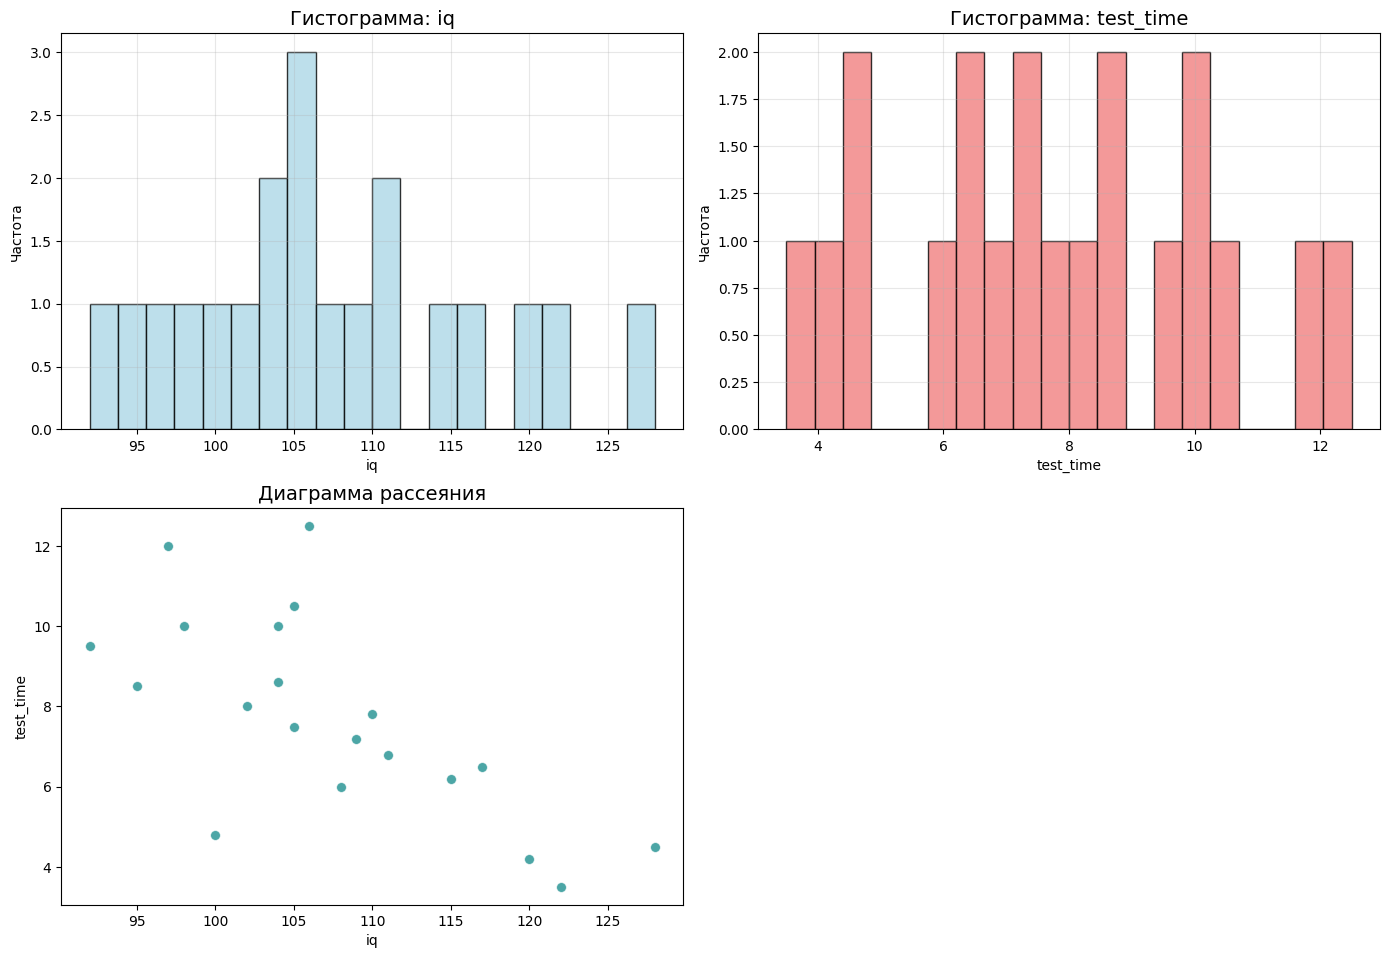

In [4]:
import matplotlib.pyplot as plt

col_name_a = df.columns[n_1]
col_name_b = df.columns[n_2]

fig = plt.figure(figsize=(14, 10))
ax1 = plt.subplot(2, 2, 1)
ax1.hist(a, bins=20, color='lightblue', edgecolor='black', alpha=0.8)
ax1.set_title(f'Гистограмма: {col_name_a}', fontsize=14)
ax1.set_xlabel(col_name_a)
ax1.set_ylabel('Частота')
ax1.grid(True, alpha=0.3)

ax2 = plt.subplot(2, 2, 2)
ax2.hist(b, bins=20, color='lightcoral', edgecolor='black', alpha=0.8)
ax2.set_title(f'Гистограмма: {col_name_b}', fontsize=14)
ax2.set_xlabel(col_name_b)
ax2.set_ylabel('Частота')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(2, 2, 3)
ax3.scatter(a, b, alpha=0.7, color='teal', edgecolors='white', linewidth=0.6, s=50)
ax3.set_xlabel(col_name_a)
ax3.set_ylabel(col_name_b)
ax3.set_title('Диаграмма рассеяния', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Распределение первой колонки приближается к нормальному. Обе величины - дискретные. Вторая распределена более равномерно. Сделать какие-то выводы сложно, тк мало данных. На диаграмме рассеяния можно видеть, что чем выше IQ, тем меньше времени требуется на тест.

In [5]:
# Уравнения регрессий

w1, w0 = np.polyfit(a, b, 1)
b_pred_linear = w1 * a + w0
